In [3]:
from scipy.optimize import newton
from scipy.signal import freqz, dimpulse, dstep
from math import sin, cos, sqrt, pi
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# adapted from https://tttapa.github.io/Pages/Mathematics/Systems-and-Control-Theory/Digital-filters/Simple%20Moving%20Average/Simple-Moving-Average.html

# Function for calculating the cut-off frequency of a moving average filter
def get_sma_cutoff(N, **kwargs):
    func = lambda w: sin(N*w/2) - N/sqrt(2) * sin(w/2)  # |H(e^jω)| = √2/2
    deriv = lambda w: cos(N*w/2) * N/2 - N/sqrt(2) * cos(w/2) / 2  # dfunc/dx
    omega_0 = pi/N  # Starting condition: halfway the first period of sin(Nω/2)
    return newton(func, omega_0, deriv, **kwargs)

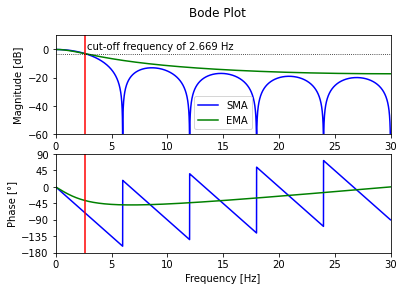

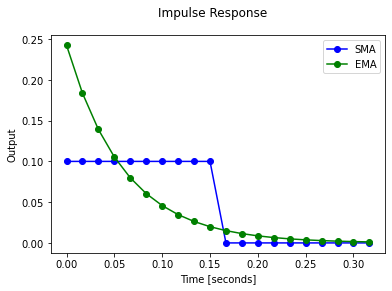

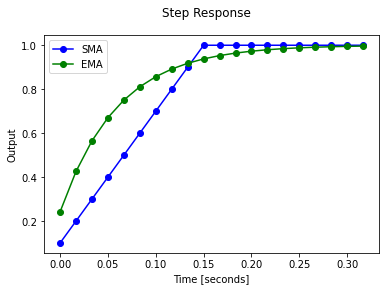

In [9]:
# Simple moving average design parameters
f_s = 60
N = 10

# Find the cut-off frequency of the SMA
w_c = get_sma_cutoff(N)
f_c = w_c * f_s / (2 * pi)

# Calculate the pole location of the EMA with the same cut-off frequency
b = 2 - 2*cos(w_c)
alpha = (-b + sqrt(b**2 + 4*b)) / 2

# SMA & EMA coefficients
b_sma = np.ones(N)
a_sma = np.array([N] + [0]*(N-1))

b_ema = np.array((alpha, 0))
a_ema = np.array((1, alpha - 1))

# Calculate the frequency response
w, h_sma = freqz(b_sma, a_sma, worN=4096)
w, h_ema = freqz(b_ema, a_ema, w)
w *= f_s / (2 * pi)                      # Convert from rad/sample to Hz

# Plot the amplitude response
plt.subplot(2, 1, 1)
plt.suptitle('Bode Plot')
plt.plot(w, 20 * np.log10(abs(h_sma)),   # Convert modulus to dB
         color='blue', label='SMA')
plt.plot(w, 20 * np.log10(abs(h_ema)),
         color='green', label='EMA')
plt.ylabel('Magnitude [dB]')
plt.xlim(0, f_s / 2)
plt.ylim(-60, 10)
plt.axvline(f_c, color='red')
plt.text(f_c + .1,0,'cut-off frequency of {} Hz'.format(round(f_c,3)))
plt.axhline(-3.01, linewidth=0.8, color='black', linestyle=':')
plt.legend()

# Plot the phase response
plt.subplot(2, 1, 2)
plt.plot(w, 180 * np.angle(h_sma) / pi,  # Convert argument to degrees
         color='blue')
plt.plot(w, 180 * np.angle(h_ema) / pi,
         color='green')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Phase [°]')
plt.xlim(0, f_s / 2)
plt.ylim(-180, 90)
plt.yticks([-180, -135, -90, -45, 0, 45, 90])
plt.axvline(f_c, color='red')
plt.show()

# Plot the impulse response
t, y_sma = dimpulse((b_sma, a_sma, 1/f_s), n=2*N)
t, y_ema = dimpulse((b_ema, a_ema, 1/f_s), n=2*N)
plt.suptitle('Impulse Response')
plt.plot(t, y_sma[0], 'o-',
         color='blue', label='SMA')
plt.plot(t, y_ema[0], 'o-',
         color='green', label='EMA')
plt.xlabel('Time [seconds]')
plt.ylabel('Output')
plt.xlim(-1/f_s, 2*N/f_s)
plt.legend()
plt.show()

# Plot the step response
t, y_sma = dstep((b_sma, a_sma, 1/f_s), n=2*N)
t, y_ema = dstep((b_ema, a_ema, 1/f_s), n=2*N)
plt.suptitle('Step Response')
plt.plot(t, y_sma[0], 'o-',
         color='blue', label='SMA')
plt.plot(t, y_ema[0], 'o-',
         color='green', label='EMA')
plt.xlabel('Time [seconds]')
plt.ylabel('Output')
plt.xlim(-1/f_s, 2*N/f_s)
plt.legend()
plt.show()